# Implementing a Perceptron

## 1) Installing Libraries

In [1]:
# !conda install numpy pandas matplotlib --yes

In [2]:
# !conda install watermark

In [3]:
%load_ext watermark
%watermark -v -p numpy,pandas,matplotlib

Python implementation: CPython
Python version       : 3.9.17
IPython version      : 8.14.0

numpy     : 1.25.0
pandas    : 1.5.3
matplotlib: 3.7.1



## 2) Loading the Dataset

In [4]:
import pandas as pd

df = pd.read_csv("perceptron_toydata-truncated.txt", sep="\t")
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [5]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

In [6]:
X_train

array([[ 0.77, -1.14],
       [-0.33,  1.44],
       [ 0.91, -3.07],
       [-0.37, -1.91],
       [-0.63, -1.53],
       [ 0.39, -1.99],
       [-0.49, -2.74],
       [-0.68, -1.52],
       [-0.1 , -3.43],
       [-0.05, -1.95],
       [ 3.88,  0.65],
       [ 0.73,  2.97],
       [ 0.83,  3.94],
       [ 1.59,  1.25],
       [ 1.14,  3.91],
       [ 1.73,  2.8 ],
       [ 1.31,  1.85],
       [ 1.56,  3.85],
       [ 1.23,  2.54],
       [ 1.33,  2.03]])

In [7]:
X_train.shape

(20, 2)

In [8]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
y_train.shape

(20,)

In [10]:
import numpy as np

np.bincount(y_train)

array([10, 10])

## 3) Visualizing the dataset

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

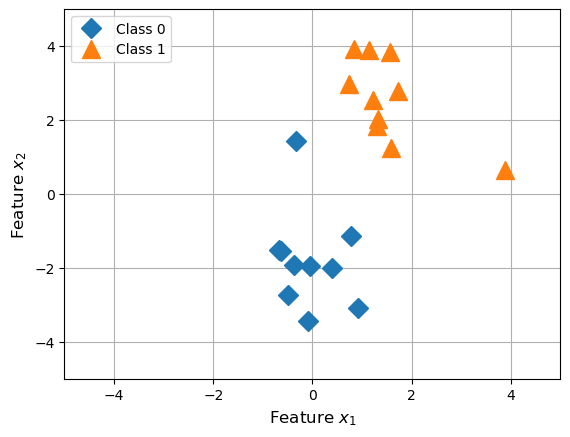

In [12]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

## 4) Implementing the Perceptron

![](images/perceptron-sketch.png)

In [13]:
np.ones(3).dot(np.ones(3))

3.0

In [14]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros(num_features) #[0.0 for _ in range(num_features)]
        self.bias = 0.0

In [15]:
ppn = Perceptron(num_features=2)

In [16]:
ppn.weights

array([0., 0.])

In [17]:
ppn.bias

0.0

![](images/computing-z.png)

In [18]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros(num_features) #[0.0 for _ in range(num_features)]
        self.bias = 0.0

    def forward(self, x):
        weighted_sum_z = self.bias + np.dot(x, self.weights)
        # for i, _ in enumerate(self.weights):
        #     weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0.0:
            prediction = 1
        else:
            prediction = 0

        return prediction

In [19]:
ppn = Perceptron(num_features=2)

x = [1.1, 2.1]
ppn.forward(x)

0

In [86]:
class Perceptron:
    def __init__(self, num_features, alpha=0.01):
        self.num_features = num_features
        # self.weights = [0.0 for _ in range(num_features)]
        # self.weights = np.zeros(num_features)
        self.weights = np.random.normal(loc=0.0, scale=0.01, size=num_features)
        self.bias = 0.0
        self.alpha = alpha

    def forward(self, x):
        weighted_sum_z = self.bias + np.dot(x, self.weights)

        if weighted_sum_z > 0.0:
            prediction = 1
        else:
            prediction = 0

        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        # update
        self.bias += error * self.alpha
        self.weights += x * (float(error) * self.alpha)

        return error

In [87]:
ppn = Perceptron(num_features=2)

x = np.array([1.1, 2.1])
ppn.update(x, true_y=1)

0

In [88]:
print("Model parameters:")
print("  Weights:", ppn.weights)
print("  Bias:", ppn.bias)

Model parameters:
  Weights: [0.00308465 0.00219604]
  Bias: 0.0


In [89]:
def train(model, all_x, all_y, epochs):

    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(all_x, all_y):
            error = model.update(x, y)
            error_count += abs(error)

        print(f"Epoch {epoch+1} errors {error_count}")

        if error_count == 0:
            break

In [92]:
ppn = Perceptron(num_features=2, alpha=0.5)

train(model=ppn, all_x=X_train, all_y=y_train, epochs=10)

Epoch 1 errors 3
Epoch 2 errors 1
Epoch 3 errors 0


In [93]:
def compute_accuracy(model, all_x, all_y):

    correct = 0.0

    for x, y in zip(all_x, all_y):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(all_y)

In [94]:
compute_accuracy(ppn, X_train, y_train)

1.0

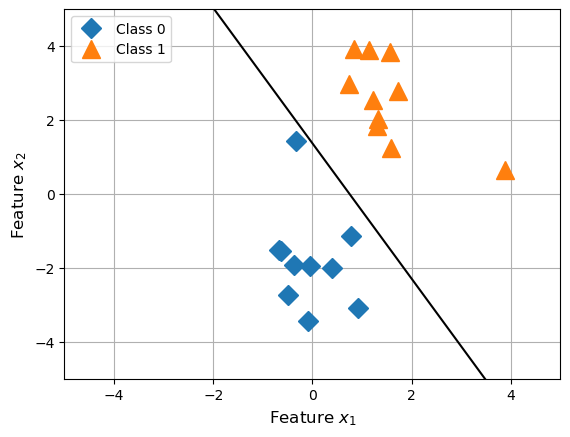

In [95]:
def plot_boundary(model):

    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max

x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)


plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()